In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier


In [3]:
df= pd.read_csv("C:/Users/Ana/Desktop/data/ENTREGABLES/02_ML/sample_mmp.csv")

C:\Users\Ana\AppData\Local\Temp\ipykernel_16664\684098241.py:1: DtypeWarning: Columns (29,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("C:/Users/Ana/Desktop/data/ENTREGABLES/02_ML/sample_mmp.csv")


In [4]:
df.head(5)

Unnamed: 0                 MachineIdentifier   ProductName EngineVersion  \
0     8427007  f1cd864e97bae82bdf96523e1a539121  win8defender   1.1.15100.1   
1     8829090  fd5ba6f5b75325ec0423a6c67cc75942  win8defender   1.1.15100.1   
2     2731904  4e628391e7cc7c482fb3286f486dbd25  win8defender   1.1.15100.1   
3     1359513  270a2e9d028144a4df12a9e3da79fba5  win8defender   1.1.15200.1   
4      236059  06ca8fa8d32c2abdc5b3577d676b3269  win8defender   1.1.15200.1   

        AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0  4.18.1807.18075  1.273.1234.0       0               7.0                 0   
1  4.18.1807.18075  1.273.1282.0       0               7.0                 0   
2   4.9.10586.1106   1.273.781.0       0               7.0                 0   
3  4.18.1807.18075  1.275.1639.0       0               7.0                 0   
4  4.18.1807.18075   1.275.511.0       0               7.0                 0   

   DefaultBrowsersIdentifier  ...  Census_FirmwareVersionIdentifier  \
0                        NaN  ...                           19951.0   
1                        NaN  ...                           48753.0   
2                        NaN  ...                           33111.0   
3                        NaN  ...                           48473.0   
4                        NaN  ...                            4343.0   

   Census_IsSecureBootEnabled  Census_IsWIMBootEnabled  \
0                           0                      NaN   
1                           0                      0.0   
2                           1                      0.0   
3                           1                      NaN   
4                           1                      NaN   

   Census_IsVirtualDevice  Census_IsTouchEnabled  Census_IsPenCapable  \
0                     0.0                      0                    0   
1                     0.0                      0                    0   
2                     0.0                      1                    1   
3                     0.0                      0                    0   
4                     0.0                      1                    0   

   Census_IsAlwaysOnAlwaysConnectedCapable  Wdft_IsGamer  \
0                                      0.0           0.0   
1                                      0.0           1.0   
2                                      0.0           0.0   
3                                      0.0           0.0   
4                                      0.0           1.0   

   Wdft_RegionIdentifier HasDetections  
0                   11.0             1  
1                    3.0             0  
2                   15.0             0  
3                   15.0             1  
4                   13.0             1  

[5 rows x 84 columns]

In [5]:
df.shape

(500000, 84)

In [6]:
df.describe().T

count          mean  \
Unnamed: 0                                         500000.0  4.458888e+06   
IsBeta                                             500000.0  2.000000e-06   
RtpStateBitfield                                   498168.0  6.846207e+00   
IsSxsPassiveMode                                   500000.0  1.724200e-02   
DefaultBrowsersIdentifier                           24061.0  1.652825e+03   
AVProductStatesIdentifier                          498062.0  4.785091e+04   
AVProductsInstalled                                498062.0  1.326763e+00   
AVProductsEnabled                                  498062.0  1.020714e+00   
HasTpm                                             500000.0  9.878160e-01   
CountryIdentifier                                  500000.0  1.080375e+02   
CityIdentifier                                     481760.0  8.127165e+04   
OrganizationIdentifier                             345437.0  2.486994e+01   
GeoNameIdentifier                                  499984.0  1.697304e+02   
LocaleEnglishNameIdentifier                        500000.0  1.226110e+02   
OsBuild                                            500000.0  1.572693e+04   
OsSuite                                            500000.0  5.747186e+02   
IsProtected                                        498074.0  9.457892e-01   
AutoSampleOptIn                                    500000.0  2.800000e-05   
SMode                                              470152.0  4.381562e-04   
IeVerIdentifier                                    496791.0  1.266626e+02   
Firewall                                           494838.0  9.782414e-01   
UacLuaenable                                       499377.0  1.372503e+01   
Census_OEMNameIdentifier                           494619.0  2.218646e+03   
Census_OEMModelIdentifier                          494236.0  2.391280e+05   
Census_ProcessorCoreCount                          497653.0  3.994074e+00   
Census_ProcessorManufacturerIdentifier             497653.0  4.529069e+00   
Census_ProcessorModelIdentifier                    497651.0  2.370987e+03   
Census_PrimaryDiskTotalCapacity                    497024.0  5.140433e+05   
Census_SystemVolumeTotalCapacity                   497024.0  3.780546e+05   
Census_HasOpticalDiskDrive                         500000.0  7.703400e-02   
Census_TotalPhysicalRAM                            495444.0  6.129232e+03   
Census_InternalPrimaryDiagonalDisplaySizeInInches  497346.0  1.668984e+01   
Census_InternalPrimaryDisplayResolutionHorizontal  497350.0  1.548304e+03   
Census_InternalPrimaryDisplayResolutionVertical    497350.0  8.982393e+02   
Census_InternalBatteryNumberOfCharges              484962.0  1.125600e+09   
Census_OSBuildNumber                               500000.0  1.584137e+04   
Census_OSBuildRevision                             500000.0  9.672248e+02   
Census_OSInstallLanguageIdentifier                 496668.0  1.460551e+01   
Census_OSUILocaleIdentifier                        500000.0  6.044631e+01   
Census_IsPortableOperatingSystem                   500000.0  5.220000e-04   
Census_IsFlightingInternal                          84775.0  2.359186e-05   
Census_IsFlightsDisabled                           491067.0  1.425467e-05   
Census_ThresholdOptIn                              181896.0  2.583894e-04   
Census_FirmwareManufacturerIdentifier              489651.0  4.026759e+02   
Census_FirmwareVersionIdentifier                   490939.0  3.303099e+04   
Census_IsSecureBootEnabled                         500000.0  4.854380e-01   
Census_IsWIMBootEnabled                            182334.0  0.000000e+00   
Census_IsVirtualDevice                             499099.0  7.066734e-03   
Census_IsTouchEnabled                              500000.0  1.254340e-01   
Census_IsPenCapable                                500000.0  3.774400e-02   
Census_IsAlwaysOnAlwaysConnectedCapable            495960.0  5.724454e-02   
Wdft_IsGamer                                      

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 84 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  int64  
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  int64  
 7   RtpStateBitfield                                   498168 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  int64 

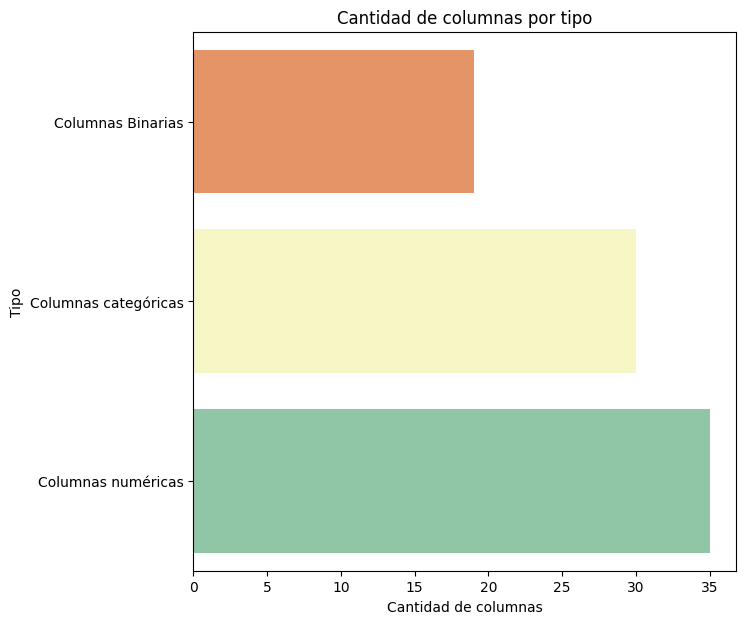

In [8]:
# Obtener información sobre registros no nulos
missing_df = pd.DataFrame({'Columna': df.columns, 'Número de registros': df.count(), 'Total': len(df)}).sort_values("Número de registros", ascending=False)

# Obtener información sobre la cardinalidad
cardinality_df = pd.DataFrame({'Columna': df.columns, 'Cardinality': df.nunique()}).sort_values("Cardinality", ascending=False)
cardinality_df = cardinality_df[cardinality_df['Cardinality'] > 2]  # Filtrar columnas con más de 2 valores únicos

# Obtener información sobre el tipo de columnas
binary_columns = [col for col in df.columns if df[col].nunique() == 2]
true_numerical_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col]) and col not in binary_columns]
categorical_columns = [col for col in df.columns if col not in true_numerical_columns and col not in binary_columns]

type_df = pd.DataFrame({'Type': ['Columnas Binarias', 'Columnas numéricas', 'Columnas categóricas'],
                        'Conteo de Columnas': [len(binary_columns), len(true_numerical_columns), len(categorical_columns)]}).sort_values('Conteo de Columnas', ascending=True)


f, ax = plt.subplots(figsize=(7, 7))


sns.barplot(x="Conteo de Columnas", y="Type", data=type_df, palette='Spectral', hue = 'Type', legend=False)

plt.title('Cantidad de columnas por tipo')
plt.xlabel('Cantidad de columnas')
plt.ylabel('Tipo')

plt.show()



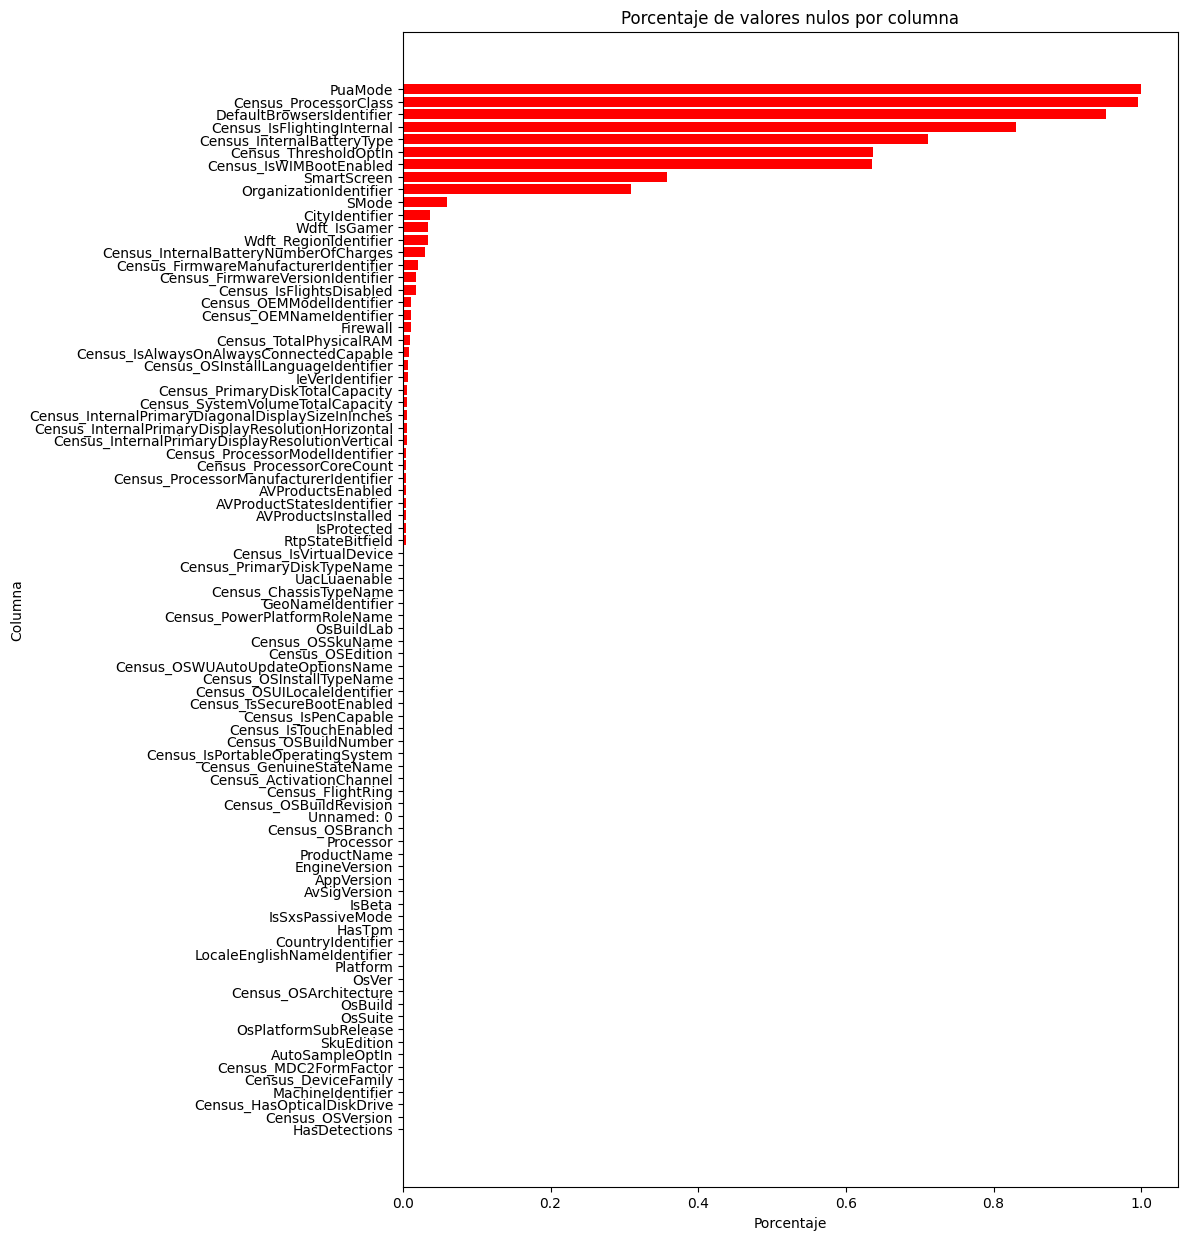

In [9]:
# Obtener el porcentaje de valores nulos por columna
df_null_values = df.isnull().mean().sort_values(ascending=False)


fig, ax = plt.subplots(figsize=(10,15))

# Crear el gráfico de barras horizontal
ax.barh(y=df_null_values.index,  # Posicionar las barras según los índices
        width=df_null_values,  
        color='red')  

# Invertir el eje Y para que las columnas aparezcan en orden correcto
ax.invert_yaxis()

plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Porcentaje')
plt.ylabel('Columna')


plt.show()


C:\Users\Ana\AppData\Local\Temp\ipykernel_16664\1086767184.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cardinalidad', y='column', data=df_cardinalidad,palette="coolwarm")


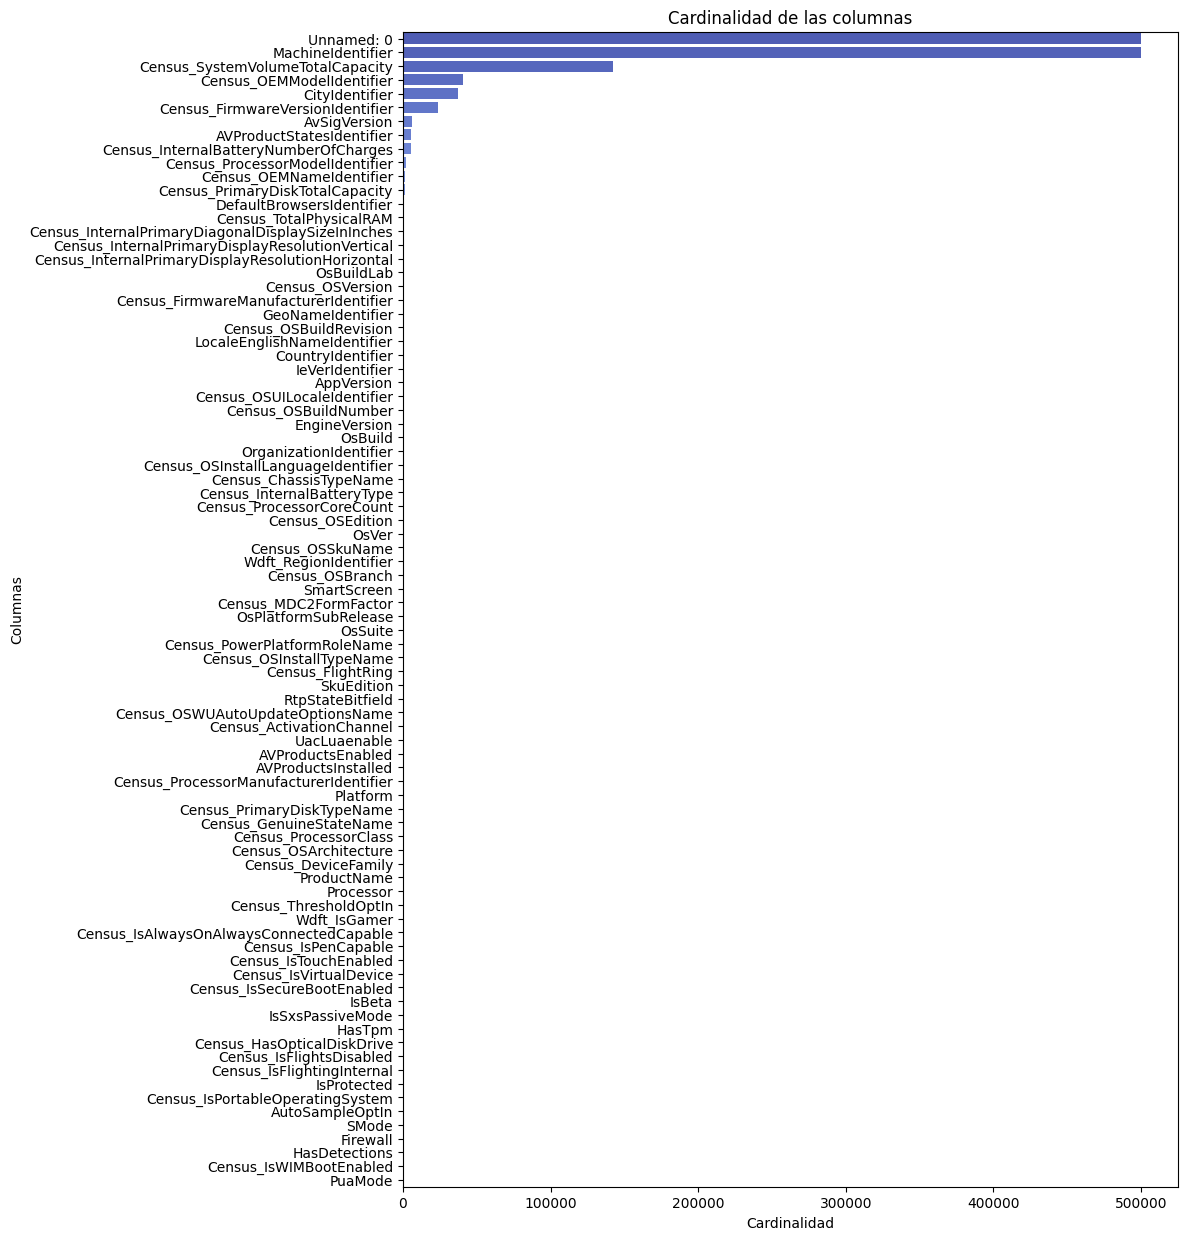

In [10]:
# Calcular la cardinalidad de cada columna
cardinalidad = df.nunique()
df_cardinalidad = pd.DataFrame({'column': cardinalidad.index, 'cardinalidad': cardinalidad.values})
df_cardinalidad = df_cardinalidad.sort_values(by='cardinalidad', ascending=False)

fig, ax = plt.subplots(figsize=(10,15))
sns.barplot(x='cardinalidad', y='column', data=df_cardinalidad,palette="coolwarm")

plt.title('Cardinalidad de las columnas')
plt.xlabel('Cardinalidad')
plt.ylabel('Columnas')

plt.show()

In [11]:
df2 = df.copy()

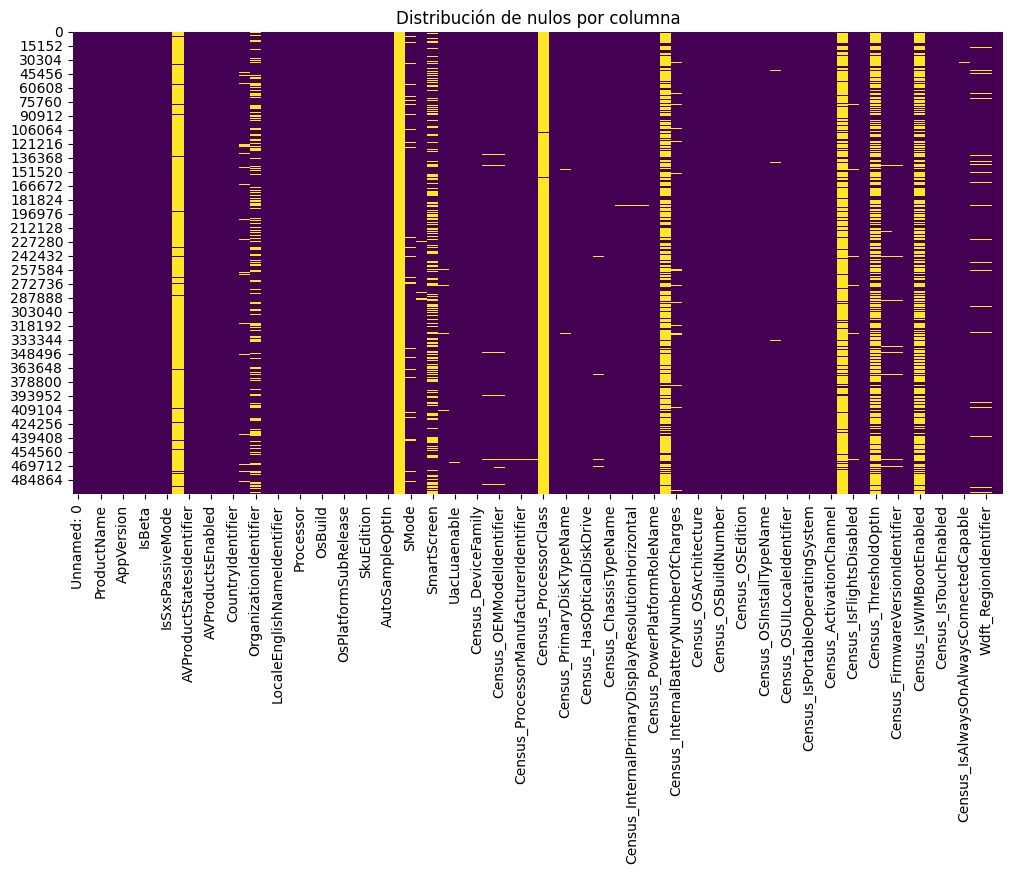

In [12]:
# Distribución de nulos 
plt.figure(figsize=(12, 6))
sns.heatmap(df2.isnull(), cbar=False, cmap='viridis')
plt.title('Distribución de nulos por columna')
plt.show()

In [153]:
# Código de imputación de valores nulos
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

numeric_imputer = SimpleImputer(strategy='median')
df[numeric_features] = numeric_imputer.fit_transform(df[numeric_features])

categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = categorical_imputer.fit_transform(df[categorical_features])


In [13]:
# Obtiene las columnas del DataFrame original
columnas_originales = set(df.columns)

# Obtiene las columnas del DataFrame después de eliminar las columnas con más del 90% de valores nulos
columnas_finales = set(df2.columns)
df2 = df.dropna(axis=1,thresh=df.shape[0]*0.9) # elimina columnas con un mínimo del 90% de info. se quedan en 75column

# Obtiene la diferencia entre las dos conjuntos de columnas
columnas_eliminadas = columnas_originales - columnas_finales

print('Las siguientes columnas fueron eliminadas:', *columnas_eliminadas, sep='\n')


Las siguientes columnas fueron eliminadas:


In [14]:
# Obtiene las columnas con más del 90% de valores nulos
columnas_con_nulos = np.where(np.mean(df2.isnull(), axis=0) > 0.9)[0]

# Si no hay columnas con más del 90% de valores nulos
if not columnas_con_nulos.size:
    print('No hay columnas con más del 90% de valores nulos')
else:
    print('Las siguientes columnas tienen más del 90% de valores nulos:')
    print(*df2.columns[columnas_con_nulos], sep='\n')


No hay columnas con más del 90% de valores nulos


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 75 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  int64  
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  int64  
 7   RtpStateBitfield                                   498168 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  int64 

In [16]:
df2 = df2.drop(["Unnamed: 0"], axis = 1)
#elimino Unnamed: 0

In [17]:
df2.set_index("MachineIdentifier", inplace = True)
#defino "MachineIdentifier" como index

In [18]:
df2.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Columns: 73 entries, ProductName to HasDetections
dtypes: float64(31), int64(17), object(25)
memory usage: 282.3+ MB


In [19]:
TARGET = 'HasDetections'
df2[TARGET].mean()

0.499906

In [20]:
df2[TARGET].value_counts(normalize= True)*100

HasDetections
0    50.0094
1    49.9906
Name: proportion, dtype: float64

In [21]:

tipos = df2.dtypes
#  diccionario para contar las columnas por tipo
columnas_por_tipo = {}
for col, tipo in tipos.items():
    if tipo not in columnas_por_tipo:
        columnas_por_tipo[tipo] = 0
    columnas_por_tipo[tipo] += 1


for tipo, num_columnas in columnas_por_tipo.items():
    print(f"{tipo}: {num_columnas}")


object: 25
int64: 17
float64: 31


In [22]:
columns_to_kill = [
'AutoSampleOptIn',
"OsBuildLab",
'Census_InternalBatteryNumberOfCharges',
"IeVerIdentifier",
"Census_OEMNameIdentifier",
'Census_InternalBatteryType',
'Census_IsFlightingInternal',
'Census_IsFlightsDisabled',
'Census_IsWIMBootEnabled',
"CountryIdentifier",
"CityIdentifier",
"GeoNameIdentifier" ,
'Census_ProcessorClass',
'Census_ThresholdOptIn',
"Census_OSBuildRevision",
'DefaultBrowsersIdentifier',
"Census_FirmwareVersionIdentifier",
'IsBeta',
"Census_InternalPrimaryDisplayResolutionHorizontal",
"Census_InternalPrimaryDisplayResolutionVertical",
"Census_InternalPrimaryDiagonalDisplaySizeInInches" ,
'PuaMode',
'UacLuaenable',
'Unnamed: 0',
"Census_OSSkuName"]



In [23]:
columns_to_drop = [col for col in columns_to_kill if col in df2.columns]
df3 = df2.drop(columns = columns_to_drop)

In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 56 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   ProductName                              500000 non-null  object 
 1   EngineVersion                            500000 non-null  object 
 2   AppVersion                               500000 non-null  object 
 3   AvSigVersion                             500000 non-null  object 
 4   RtpStateBitfield                         498168 non-null  float64
 5   IsSxsPassiveMode                         500000 non-null  int64  
 6   AVProductStatesIdentifier                498062 non-null  float64
 7   AVProductsInstalled                      498062 non-null  float64
 8   AVProductsEnabled                        498062 non-null  float64
 9   HasTpm                                   500000 non

In [25]:
# Detectar filas duplicadas

df3[df3.duplicated(keep = False)]

ProductName EngineVersion       AppVersion  \
MachineIdentifier                                                               
1199ef436084e2549e29665e1198b653  win8defender   1.1.14104.0    4.12.16299.15   
57d85f393aefe874da48ba804bbcab53  win8defender   1.1.15200.1  4.18.1807.18075   
adc45a59f8f993f04bbc9fbacc3237e7  win8defender   1.1.14600.4     4.13.17134.1   
076419ebbf5c2a2f01d28305e0cc26b5  win8defender   1.1.15100.1  4.18.1807.18075   
b8f2beb43419cefdaead05b5a23e060f  win8defender   1.1.15200.1  4.18.1807.18075   
...                                        ...           ...              ...   
a911fc2729dbe6b52fdf4f1366a44999  win8defender   1.1.15100.1  4.18.1806.18062   
fe5b72e09b527dcf8effaf9fa4cd9350  win8defender   1.1.13504.0   4.11.15063.447   
408bfa24b576ee36cc5ce1b35cb51b53  win8defender   1.1.15200.1  4.18.1807.18075   
9cf3f0f29f29dae62f5c5dde62dd9517  win8defender   1.1.13504.0     4.11.15063.0   
3d629ccc71bc9ff16d1090c54395530a  win8defender   1.1.14104.0    4.12.16299.15   

                                  AvSigVersion  RtpStateBitfield  \
MachineIdentifier                                                  
1199ef436084e2549e29665e1198b653    1.251.42.0               7.0   
57d85f393aefe874da48ba804bbcab53    1.275.11.0               7.0   
adc45a59f8f993f04bbc9fbacc3237e7    1.263.48.0               7.0   
076419ebbf5c2a2f01d28305e0cc26b5  1.273.1494.0               7.0   
b8f2beb43419cefdaead05b5a23e060f  1.275.1198.0               7.0   
...                                        ...               ...   
a911fc2729dbe6b52fdf4f1366a44999   1.273.371.0               7.0   
fe5b72e09b527dcf8effaf9fa4cd9350     1.237.0.0               7.0   
408bfa24b576ee36cc5ce1b35cb51b53   1.275.400.0               7.0   
9cf3f0f29f29dae62f5c5dde62dd9517     1.237.0.0               7.0   
3d629ccc71bc9ff16d1090c54395530a    1.251.42.0               7.0   

                                  IsSxsPassiveMode  AVProductStatesIdentifier  \
MachineIdentifier                                                               
1199ef436084e2549e29665e1198b653                 0                    53447.0   
57d85f393aefe874da48ba804bbcab53                 0                    53447.0   
adc45a59f8f993f04bbc9fbacc3237e7                 0                    53447.0   
076419ebbf5c2a2f01d28305e0cc26b5                 0                    53447.0   
b8f2beb43419cefdaead05b5a23e060f                 0                    53447.0   
...                                            ...                        ...   
a911fc2729dbe6b52fdf4f1366a44999                 0                    53447.0   
fe5b72e09b527dcf8effaf9fa4cd9350                 0                    53447.0   
408bfa24b576ee36cc5ce1b35cb51b53                 0                    53447.0   
9cf3f0f29f29dae62f5c5dde62dd9517                 0                    61100.0   
3d629ccc71bc9ff16d1090c54395530a                 0                    62773.0   

                                  AVProductsInstalled  AVProductsEnabled  \
MachineIdentifier                                                          
1199ef436084e2549e29665e1198b653                  1.0                1.0   
57d85f393aefe874da48ba804bbcab53                  1.0                1.0   
adc45a59f8f993f04bbc9fbacc3237e7                  1.0                1.0   
076419ebbf5c2a2f01d28305e0cc26b5                  1.0                1.0   
b8f2beb43419cefdaead05b5a23e060f                  1.0                1.0   
...                                               ...                ...   
a911fc2729dbe6b52fdf4f1366a44999                  1.0                1.0   
fe5b72e09b527dcf8effaf9fa4cd9350                  1.0                1.0   
408bfa24b576ee36cc5ce1b35cb51b53                  1.0                1.0   
9cf3f0f29f29dae62f5c5dde62dd9517                  2.0                1.0   
3d629ccc71bc9ff16d1090c54395530a                  1.0                1.0   

                                  HasTpm  ...  Census

In [26]:
# eliminar filas duplicadas
df3.drop_duplicates(inplace=True)
 #verificar 0 filas duplicadas
df3[df3.duplicated(keep=False)]

Empty DataFrame
Columns: [ProductName, EngineVersion, AppVersion, AvSigVersion, RtpStateBitfield, IsSxsPassiveMode, AVProductStatesIdentifier, AVProductsInstalled, AVProductsEnabled, HasTpm, LocaleEnglishNameIdentifier, Platform, Processor, OsVer, OsBuild, OsSuite, OsPlatformSubRelease, SkuEdition, IsProtected, SMode, Firewall, Census_MDC2FormFactor, Census_DeviceFamily, Census_OEMModelIdentifier, Census_ProcessorCoreCount, Census_ProcessorManufacturerIdentifier, Census_ProcessorModelIdentifier, Census_PrimaryDiskTotalCapacity, Census_PrimaryDiskTypeName, Census_SystemVolumeTotalCapacity, Census_HasOpticalDiskDrive, Census_TotalPhysicalRAM, Census_ChassisTypeName, Census_PowerPlatformRoleName, Census_OSVersion, Census_OSArchitecture, Census_OSBranch, Census_OSBuildNumber, Census_OSEdition, Census_OSInstallTypeName, Census_OSInstallLanguageIdentifier, Census_OSUILocaleIdentifier, Census_OSWUAutoUpdateOptionsName, Census_IsPortableOperatingSystem, Census_GenuineStateName, Census_ActivationChannel, Census_FlightRing, Census_FirmwareManufacturerIdentifier, Census_IsSecureBootEnabled, Census_IsVirtualDevice, Census_IsTouchEnabled, Census_IsPenCapable, Census_IsAlwaysOnAlwaysConnectedCapable, Wdft_IsGamer, Wdft_RegionIdentifier, HasDetections]
Index: []

[0 rows x 56 columns]

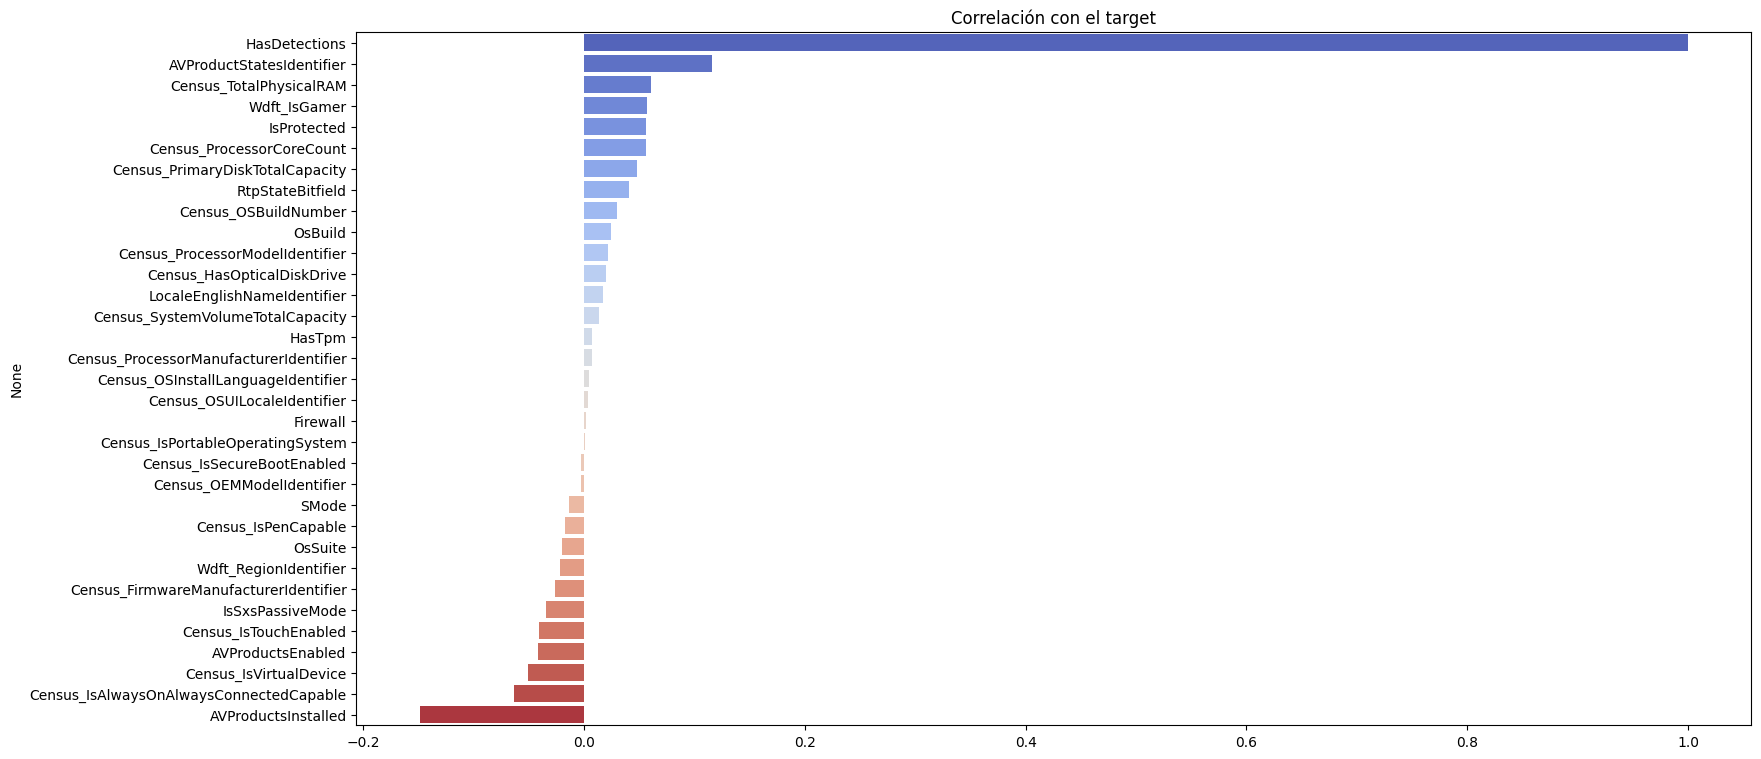

In [27]:
# Calcular la matriz de correlación con respecto a la variable objetivo
correlacion_numericas = df3.select_dtypes(include=['number']).corr()['HasDetections'].sort_values(ascending=False)

# Crear un gráfico de barras para visualizar la correlación
plt.figure(figsize=(18, 9))
sns.barplot(x=correlacion_numericas.values, y=correlacion_numericas.index, hue=correlacion_numericas.index, palette='coolwarm', legend=False)

plt.title('Correlación con el target')

plt.show()


In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499922 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 56 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   ProductName                              499922 non-null  object 
 1   EngineVersion                            499922 non-null  object 
 2   AppVersion                               499922 non-null  object 
 3   AvSigVersion                             499922 non-null  object 
 4   RtpStateBitfield                         498090 non-null  float64
 5   IsSxsPassiveMode                         499922 non-null  int64  
 6   AVProductStatesIdentifier                497984 non-null  float64
 7   AVProductsInstalled                      497984 non-null  float64
 8   AVProductsEnabled                        497984 non-null  float64
 9   HasTpm                                   499922 non

In [29]:
df4 = df3.copy()

In [30]:
def setOthers(dataframe, column, num_values):
    top_categories = dataframe[column].value_counts().head(num_values)
    top_categories_list = top_categories.index.to_list()
    top_categories_list.append(f'Otros ({column})')
    dataframe[column] = pd.Categorical(dataframe[column], categories=top_categories_list)
    return dataframe[column].fillna(f'Otros ({column})')

In [31]:
df4['Census_PrimaryDiskTypeName'].nunique()

4

In [32]:
df4['Census_PrimaryDiskTypeName'].value_counts(dropna = False)

Census_PrimaryDiskTypeName
HDD            325382
SSD            138126
UNKNOWN         20081
Unspecified     15624
NaN               709
Name: count, dtype: int64

In [33]:
df4['Census_PrimaryDiskTypeName'] = setOthers(df4, 'Census_PrimaryDiskTypeName', 2)

In [34]:
df4['Census_PrimaryDiskTypeName'].value_counts(dropna = False)

Census_PrimaryDiskTypeName
HDD                                   325382
SSD                                   138126
Otros (Census_PrimaryDiskTypeName)     36414
Name: count, dtype: int64

In [35]:
df4['SkuEdition'].value_counts(dropna = False)

SkuEdition
Home               308531
Pro                181001
Invalid              4423
Education            2320
Enterprise           1999
Enterprise LTSB      1141
Cloud                 309
Server                198
Name: count, dtype: int64

In [36]:
df4['SkuEdition'] = setOthers(df4, 'SkuEdition', 2)

In [37]:
df4['Census_ChassisTypeName'].value_counts(dropna = False)

Census_ChassisTypeName
Notebook               294194
Desktop                104955
Laptop                  38260
Portable                20181
AllinOne                11400
MiniTower                4848
Convertible              4685
Other                    4212
UNKNOWN                  3695
Detachable               2929
LowProfileDesktop        2877
HandHeld                 2651
SpaceSaving              1689
Tablet                    730
Tower                     692
Unknown                   575
MainServerChassis         512
MiniPC                    260
LunchBox                  224
RackMountChassis          189
SubNotebook                47
BusExpansionChassis        38
NaN                        37
30                         11
StickPC                     7
0                           5
MultisystemChassis          3
35                          3
PizzaBox                    3
Blade                       3
31                          2
SubChassis                  2
32               

In [38]:
df4['Census_ChassisTypeName'] = setOthers(df4, 'Census_ChassisTypeName', 5)


In [39]:
df4['Census_PowerPlatformRoleName'] = setOthers(df4, 'Census_PowerPlatformRoleName', 3)

In [40]:
df4["Census_PowerPlatformRoleName"].value_counts(dropna = False, normalize= True)*100


Census_PowerPlatformRoleName
Mobile                                  69.279208
Desktop                                 23.207020
Slate                                    5.494857
Otros (Census_PowerPlatformRoleName)     2.018915
Name: proportion, dtype: float64

In [41]:

df4['OsPlatformSubRelease'] = setOthers(df4, 'OsPlatformSubRelease', 7)

In [42]:
df4["OsPlatformSubRelease"].value_counts(dropna = False)


OsPlatformSubRelease
rs4                             220750
rs3                             139883
rs2                              43328
rs1                              40715
th2                              22955
th1                              15009
windows8.1                       10825
Otros (OsPlatformSubRelease)      6457
Name: count, dtype: int64

In [46]:
df4['Census_MDC2FormFactor'] = setOthers(df4, 'Census_MDC2FormFactor', 5)

In [47]:
df4["Census_MDC2FormFactor"].value_counts(dropna = False, normalize= True)*100


Census_MDC2FormFactor
Notebook                         64.192814
Desktop                          21.903217
Convertible                       4.474298
Detachable                        3.360324
AllInOne                          3.273311
Otros (Census_MDC2FormFactor)     2.796036
Name: proportion, dtype: float64

In [48]:
df4['Census_OSEdition'] = setOthers(df4, 'Census_OSEdition', 3)

In [49]:
df4["Census_OSEdition"].value_counts(dropna = False, normalize= True)*100

Census_OSEdition
Core                        38.898068
Professional                35.160085
CoreSingleLanguage          21.737391
Otros (Census_OSEdition)     4.204456
Name: proportion, dtype: float64

In [50]:
df4['Census_FlightRing'] = setOthers(df4, 'Census_FlightRing', 1)
#AGRUPO EN RETAIL 93,6% Y OTROS 6,3% 

In [51]:
df4["Census_FlightRing"].value_counts(dropna = False, normalize= True)*100

Census_FlightRing
Retail                       93.661211
Otros (Census_FlightRing)     6.338789
Name: proportion, dtype: float64

In [52]:
df4["Platform"].value_counts(dropna = False)

Platform
windows10      482970
windows8        10825
windows7         5314
windows2016       813
Name: count, dtype: int64

In [53]:
df4.drop(df4[(df4["Platform"] == "windows2016")].index, inplace=True)
#elimino windows2016, no llega al 1º de la totalidad

In [54]:
df4["Processor"].value_counts(dropna = False, normalize= True)*100

Processor
x64      90.868928
x86       9.128267
arm64     0.002805
Name: proportion, dtype: float64

In [55]:
df4.drop(df4[(df4["Processor"] == "arm64")].index, inplace=True)
#elimino arm64, no llega al 1º de la totalidad

In [56]:
df4["Census_DeviceFamily"].value_counts(dropna = False, normalize= True)*100

Census_DeviceFamily
Windows.Desktop    99.999199
Windows.Server      0.000601
Windows             0.000200
Name: proportion, dtype: float64

In [57]:
df4.drop(["Census_DeviceFamily"],axis = 1, inplace=True)
#elimino columna, desktop 99.99%

In [58]:
df4["Census_OSInstallTypeName"].value_counts(dropna = False, normalize= True)*100

Census_OSInstallTypeName
UUPUpgrade        29.407828
IBSClean          18.347810
Update            17.809836
Upgrade           14.026989
Other              9.397610
Reset              7.314840
Refresh            2.312185
Clean              0.778409
CleanPCRefresh     0.604494
Name: proportion, dtype: float64

In [59]:
df4["Census_OSInstallTypeName"] = df4["Census_OSInstallTypeName"].replace({"UUPUpgrade":"Upgrade"})
df4["Census_OSInstallTypeName"] = df4["Census_OSInstallTypeName"].replace({"IBSClean":"Clean"})
df4["Census_OSInstallTypeName"] = df4["Census_OSInstallTypeName"].replace({"CleanPCRefresh":"Clean"})
df4["Census_OSInstallTypeName"] = df4["Census_OSInstallTypeName"].replace({"Refresh":"Clean"})

In [60]:
df4["Census_OSWUAutoUpdateOptionsName"].value_counts(dropna = False, normalize= True)*100


Census_OSWUAutoUpdateOptionsName
FullAuto                                 44.571074
UNKNOWN                                  28.233903
Notify                                   22.740360
AutoInstallAndRebootAtMaintenanceTime     4.152917
Off                                       0.301746
Name: proportion, dtype: float64

In [61]:
df4.drop(df4[(df4["Census_OSWUAutoUpdateOptionsName"] == "Off")].index, inplace=True)
# elimino Off <1%

In [62]:
df4["Census_GenuineStateName"].value_counts(dropna = False, normalize= True)*100

Census_GenuineStateName
IS_GENUINE         88.293150
INVALID_LICENSE     8.974676
OFFLINE             2.576624
UNKNOWN             0.155550
Name: proportion, dtype: float64

In [63]:
df4.drop(df4[(df4["Census_GenuineStateName"] == "UNKNOWN")].index, inplace=True)

In [64]:
df4["Census_ActivationChannel"].value_counts(dropna = False, normalize= True)*100

Census_ActivationChannel
Retail         52.821674
OEM:DM         38.479313
Volume:GVLK     5.042722
OEM:NONSLP      3.562091
Volume:MAK      0.094200
Name: proportion, dtype: float64

In [65]:
df4["Census_ActivationChannel"] = df4["Census_ActivationChannel"].replace({"OEM:NONSLP":"OEM:DM"})
df4["Census_ActivationChannel"] = df4["Census_ActivationChannel"].replace({"OEM:DM":"OEM"})
df4["Census_ActivationChannel"] = df4["Census_ActivationChannel"].replace({"Volume:GVLK":"Volume:MAK"})
df4["Census_ActivationChannel"] = df4["Census_ActivationChannel"].replace({"Volume:MAK":"Volume"})
#agrupo nombres

In [66]:
def truncate_and_replace(dataframe, column, truncate_length):
    dataframe[column] = dataframe[column].str[:truncate_length]

In [67]:
truncate_and_replace(df4,'EngineVersion',7 )

In [68]:
truncate_and_replace(df4,'AppVersion',4 )


In [69]:
truncate_and_replace(df4,'AvSigVersion',5 )


In [70]:
df4["OsVer"].value_counts(dropna = False, normalize= True)*100

OsVer
10.0.0.0      96.751306
6.3.0.0        2.172640
6.1.1.0        1.061763
6.1.0.0        0.006642
10.0.3.0       0.002415
10.0.1.0       0.001409
6.3.3.0        0.000403
10.0.0.1       0.000403
6.3.1.0        0.000403
10.0.32.72     0.000403
10.0.32.0      0.000201
10.0.80.0      0.000201
10.0.5.0       0.000201
10.0.2.0       0.000201
6.3.5.0        0.000201
10.0.4.0       0.000201
10.0.8.0       0.000201
10.0.0.112     0.000201
6.3.32.72      0.000201
6.3.7.0        0.000201
10.0.7.0       0.000201
Name: proportion, dtype: float64

In [71]:
truncate_and_replace(df4,'OsVer',4 )


In [72]:
truncate_and_replace(df4,'Census_OSVersion',7 )


In [73]:
df4["OsVer"] = df4["OsVer"].replace({"6.3.":"6.3"})
df4["OsVer"] = df4["OsVer"].replace({"6.1.":"6.1"})


In [74]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496815 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 55 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   ProductName                              496815 non-null  object  
 1   EngineVersion                            496815 non-null  object  
 2   AppVersion                               496815 non-null  object  
 3   AvSigVersion                             496815 non-null  object  
 4   RtpStateBitfield                         494987 non-null  float64 
 5   IsSxsPassiveMode                         496815 non-null  int64   
 6   AVProductStatesIdentifier                495693 non-null  float64 
 7   AVProductsInstalled                      495693 non-null  float64 
 8   AVProductsEnabled                        495693 non-null  float64 
 9   HasTpm                                  

In [75]:
# Punto de control, reviso numericas
df5 = df4.copy()

In [76]:
corr_df = df5.corr(numeric_only=True)
corr_df.style.background_gradient(cmap="coolwarm")

In [77]:
#creo lista para eliminar columnas con mucha correlacion 
to_kill_columns_corr = [
    "RtpStateBitfield",
    "Census_ProcessorModelIdentifier", 
    "Census_OSUILocaleIdentifier",
    "Census_OSBuildNumber",
    "Census_SystemVolumeTotalCapacity",
    "Census_OSInstallLanguageIdentifier"
]

In [78]:
df5.drop((to_kill_columns_corr), axis = 1, inplace = True)

In [79]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496815 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 49 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   ProductName                              496815 non-null  object  
 1   EngineVersion                            496815 non-null  object  
 2   AppVersion                               496815 non-null  object  
 3   AvSigVersion                             496815 non-null  object  
 4   IsSxsPassiveMode                         496815 non-null  int64   
 5   AVProductStatesIdentifier                495693 non-null  float64 
 6   AVProductsInstalled                      495693 non-null  float64 
 7   AVProductsEnabled                        495693 non-null  float64 
 8   HasTpm                                   496815 non-null  int64   
 9   LocaleEnglishNameIdentifier             

In [80]:
corr_df = df5.corr(numeric_only=True)
corr_df.style.background_gradient(cmap="coolwarm")

In [81]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496815 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 49 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   ProductName                              496815 non-null  object  
 1   EngineVersion                            496815 non-null  object  
 2   AppVersion                               496815 non-null  object  
 3   AvSigVersion                             496815 non-null  object  
 4   IsSxsPassiveMode                         496815 non-null  int64   
 5   AVProductStatesIdentifier                495693 non-null  float64 
 6   AVProductsInstalled                      495693 non-null  float64 
 7   AVProductsEnabled                        495693 non-null  float64 
 8   HasTpm                                   496815 non-null  int64   
 9   LocaleEnglishNameIdentifier             

In [82]:
df5.describe(include = "number").T

count           mean  \
IsSxsPassiveMode                         496815.0       0.017240   
AVProductStatesIdentifier                495693.0   47848.138192   
AVProductsInstalled                      495693.0       1.326771   
AVProductsEnabled                        495693.0       1.020591   
HasTpm                                   496815.0       0.987855   
LocaleEnglishNameIdentifier              496815.0     122.683568   
OsBuild                                  496815.0   15725.917205   
OsSuite                                  496815.0     576.480179   
IsProtected                              495705.0       0.945760   
SMode                                    467158.0       0.000439   
Firewall                                 491712.0       0.978825   
Census_OEMModelIdentifier                491113.0  238932.857947   
Census_ProcessorCoreCount                494473.0       3.988808   
Census_ProcessorManufacturerIdentifier   494473.0       4.528431   
Census_PrimaryDiskTotalCapacity          493852.0  514282.084760   
Census_HasOpticalDiskDrive               496815.0       0.076992   
Census_TotalPhysicalRAM                  492368.0    6105.919071   
Census_IsPortableOperatingSystem         496815.0       0.000525   
Census_FirmwareManufacturerIdentifier    486892.0     402.545710   
Census_IsSecureBootEnabled               496815.0       0.487711   
Census_IsVirtualDevice                   495915.0       0.005503   
Census_IsTouchEnabled                    496815.0       0.125858   
Census_IsPenCapable                      496815.0       0.037722   
Census_IsAlwaysOnAlwaysConnectedCapable  492794.0       0.057478   
Wdft_IsGamer                             479937.0       0.284669   
Wdft_RegionIdentifier                    479937.0       7.889369   
HasDetections                            496815.0       0.500492   

                                                   std      min       25%  \
IsSxsPassiveMode                              0.130164      0.0       0.0   
AVProductStatesIdentifier                 14024.633923      3.0   49480.0   
AVProductsInstalled                           0.522846      1.0       1.0   
AVProductsEnabled                             0.166131      0.0       1.0   
HasTpm                                        0.109535      0.0       1.0   
LocaleEnglishNameIdentifier                  69.320837      1.0      74.0   
OsBuild                                    2192.594927   7600.0   15063.0   
OsSuite                                     247.747049    256.0     256.0   
IsProtected                                   0.226491      0.0       1.0   
SMode                                         0.020944      0.0       0.0   
Firewall                                      0.143968      0.0       1.0   
Census_OEMModelIdentifier                 72025.691915      1.0  189586.0   
Census_ProcessorCoreCount                     2.028492      1.0       2.0   
Census_ProcessorManufacturerIdentifier        1.289901      1.0       5.0   
Census_PrimaryDiskTotalCapacity          363229.083215  10471.0  239372.0   
Census_HasOpticalDiskDrive                    0.266580      0.0       0.0   
Census_TotalPhysicalRAM                    4762.467888    512.0    4096.0   
Census_IsPortableOperatingSystem              0.022914      0.0       0.0   
Census_FirmwareManufacturerIdentifier       221.333976     11.0     142.0   
Census_IsSecureBootEnabled                    0.499849      0.0       0.0   
Census_IsVirtualDevice                        0.073978      0.0       0.0   
Census_IsTouchEnabled                         0.331689      0.0       0.0   
Census_IsPenCapable                           0.190524      0.0       0.0   
Census_IsAlwaysOnAlwaysConnectedCapable       0.232755      0.0       0.0   
Wdft_IsGamer                                  0.451257      0.0       0.0   
Wdft_RegionIdentifier                         4.552835      1.0       3.0   
HasDetections                                 0.500000      

In [83]:
def mostrar_categorias_mayores_a_2(df, columna):
  """
  Muestra las categorías de una columna de un DataFrame que tienen una frecuencia mayor al 2%, junto con su porcentaje.

  Args:
    df: DataFrame de Pandas.
    columna: Nombre de la columna a analizar.
  """

  # Calcular la frecuencia de cada categoría
  frecuencias = df[columna].value_counts(normalize=True) * 100

  # Seleccionar categorías con frecuencia superior al 2%
  categorias_mayores_a_2 = frecuencias[frecuencias > 2].index

  # Mostrar las categorías y su porcentaje
  print(f"Categorías con frecuencia mayor al 2% en la columna '{columna}':")
  for categoria in categorias_mayores_a_2:
    print(f"- {categoria}: {frecuencias[categoria]:.2f}%")

In [84]:
def setnumber(dataframe, column, num_values):
    numeric_column = pd.to_numeric(dataframe[column], errors='coerce')
    top_categories = numeric_column.value_counts().head(num_values)
    top_categories_list = top_categories.index.to_list()
    top_categories_list.append(-1)
    dataframe[column] = pd.Categorical(numeric_column, categories=top_categories_list, ordered=False)
    dataframe[column] = dataframe[column].astype(float).fillna(-1)
    return dataframe[column]

In [86]:
df5["OsBuild"].value_counts(dropna = False, normalize= True)*100
#agrupo 7 valores, resto -1

OsBuild
17134    44.222296
16299    27.943601
15063     8.712499
14393     8.018075
10586     4.615199
10240     3.018427
9600      2.174049
7601      1.061763
17692     0.031199
17738     0.026569
17744     0.025764
17758     0.017109
17746     0.012479
17713     0.012077
17754     0.011272
17751     0.010265
17741     0.010064
17755     0.009058
17735     0.007246
17686     0.007045
17763     0.006642
17733     0.006642
7600      0.006642
17760     0.006240
17682     0.004026
17677     0.003422
18234     0.003221
17672     0.002818
18242     0.002415
18237     0.002214
17661     0.001610
17666     0.001610
17723     0.000805
17634     0.000805
17639     0.000604
17730     0.000604
17618     0.000604
17747     0.000604
17655     0.000403
17650     0.000403
17753     0.000201
17604     0.000201
18214     0.000201
17711     0.000201
17704     0.000201
18219     0.000201
17623     0.000201
17749     0.000201
Name: proportion, dtype: float64

In [87]:
mostrar_categorias_mayores_a_2(df5, 'OsBuild')

Categorías con frecuencia mayor al 2% en la columna 'OsBuild':
- 17134: 44.22%
- 16299: 27.94%
- 15063: 8.71%
- 14393: 8.02%
- 10586: 4.62%
- 10240: 3.02%
- 9600: 2.17%


In [88]:
df5['OsBuild'] = setnumber(df5, 'OsBuild', 7)
df5["OsBuild"] = df5["OsBuild"].replace(-1, 5000)
# el -1 es el 1.2%,lo convierto en 17134.0


In [89]:
df5["Census_ProcessorCoreCount"].value_counts(dropna = False, normalize= True)*100

Census_ProcessorCoreCount
4.0     60.921872
2.0     25.836579
8.0      9.790767
12.0     1.034993
6.0      0.797279
1.0      0.744341
NaN      0.471403
16.0     0.186387
3.0      0.145527
20.0     0.017512
32.0     0.017109
24.0     0.015700
40.0     0.005032
28.0     0.003422
36.0     0.003221
5.0      0.002013
48.0     0.002013
10.0     0.001812
56.0     0.001006
7.0      0.000403
64.0     0.000403
11.0     0.000201
44.0     0.000201
52.0     0.000201
80.0     0.000201
14.0     0.000201
46.0     0.000201
Name: proportion, dtype: float64

In [90]:
df5['Census_ProcessorCoreCount'] = setnumber(df5, 'Census_ProcessorCoreCount', 3)

In [91]:
df5["Census_PrimaryDiskTotalCapacity"].value_counts(dropna = False, normalize= True)*100

Census_PrimaryDiskTotalCapacity
476940.0    31.799161
953869.0    24.523414
305245.0     5.338003
122104.0     5.304792
244198.0     5.050572
              ...    
339968.0     0.000201
156204.0     0.000201
121392.0     0.000201
19698.0      0.000201
152499.0     0.000201
Name: proportion, Length: 955, dtype: float64

In [92]:
def agruparcientosmiles(dataframe, column, num_bins):
    bins = [0, 100001, 200001, 500001, 1000001, float('inf')]
    labels = [100000, 200000, 500000, 1000000, 1000001]
    binned_values = pd.cut(dataframe[column], bins=bins, labels=labels, include_lowest=True)
    dataframe[column] = binned_values
    return dataframe[column]

In [93]:
agruparcientosmiles(df5, "Census_PrimaryDiskTotalCapacity", 5)

MachineIdentifier
f1cd864e97bae82bdf96523e1a539121    1000000
fd5ba6f5b75325ec0423a6c67cc75942     500000
4e628391e7cc7c482fb3286f486dbd25     500000
270a2e9d028144a4df12a9e3da79fba5     500000
06ca8fa8d32c2abdc5b3577d676b3269     500000
                                     ...   
a739cacc292f3f1e745827c1ca6c6ada     500000
a4c232d528d98343e8f1b73650da7b82     200000
fd16cd542d660848d272e4552bcccb1e     500000
fa0841f8f6147de7c3d287e05270ed42    1000000
7b45dc3537e17f16305c5983ca0a1cb9     500000
Name: Census_PrimaryDiskTotalCapacity, Length: 496815, dtype: category
Categories (5, int64): [100000 < 200000 < 500000 < 1000000 < 1000001]

In [94]:
df5["Census_PrimaryDiskTotalCapacity"].value_counts(dropna = False, normalize= True)*100

Census_PrimaryDiskTotalCapacity
500000     50.318730
1000000    28.719745
200000     10.856355
100000      8.148305
1000001     1.360466
NaN         0.596399
Name: proportion, dtype: float64

In [95]:
df5["Census_PrimaryDiskTotalCapacity"] = df5["Census_PrimaryDiskTotalCapacity"].astype("float")
df5["Census_PrimaryDiskTotalCapacity"] = df5["Census_PrimaryDiskTotalCapacity"].fillna(0)

In [96]:
def category_float (df, columns):
    df["columns"] = df["columns"].astype("float")
    df["columns"] = df["columns"].fillna(0)

In [97]:
mostrar_categorias_mayores_a_2(df5, "Census_TotalPhysicalRAM")

Categorías con frecuencia mayor al 2% en la columna 'Census_TotalPhysicalRAM':
- 4096.0: 46.25%
- 8192.0: 24.90%
- 2048.0: 12.45%
- 16384.0: 6.07%
- 6144.0: 4.52%


In [98]:
def agrupa_miles(dataframe, column, num_bins):
    bins = [0, 2001, 5001, 10001, float('inf')]
    labels = [2000, 5000, 10000, 20000]
    binned_values = pd.cut(dataframe[column], bins=bins, labels=labels, include_lowest=True)
    dataframe[column] = binned_values
    return dataframe[column]

In [99]:
agrupa_miles(df5, "Census_TotalPhysicalRAM", 4)

MachineIdentifier
f1cd864e97bae82bdf96523e1a539121    10000
fd5ba6f5b75325ec0423a6c67cc75942    10000
4e628391e7cc7c482fb3286f486dbd25    10000
270a2e9d028144a4df12a9e3da79fba5    10000
06ca8fa8d32c2abdc5b3577d676b3269     5000
                                    ...  
a739cacc292f3f1e745827c1ca6c6ada     5000
a4c232d528d98343e8f1b73650da7b82    10000
fd16cd542d660848d272e4552bcccb1e     5000
fa0841f8f6147de7c3d287e05270ed42    10000
7b45dc3537e17f16305c5983ca0a1cb9    20000
Name: Census_TotalPhysicalRAM, Length: 496815, dtype: category
Categories (4, int64): [2000 < 5000 < 10000 < 20000]

In [100]:
df5["Census_TotalPhysicalRAM"].value_counts(dropna = False)

Census_TotalPhysicalRAM
5000     298438
10000    145647
20000     44308
NaN        4447
2000       3975
Name: count, dtype: int64

In [101]:
mostrar_categorias_mayores_a_2(df5, "Census_FirmwareManufacturerIdentifier")

Categorías con frecuencia mayor al 2% en la columna 'Census_FirmwareManufacturerIdentifier':
- 142.0: 30.91%
- 628.0: 14.07%
- 554.0: 13.47%
- 355.0: 10.77%
- 556.0: 9.21%
- 500.0: 4.43%
- 93.0: 2.19%


In [102]:
df5["Census_FirmwareManufacturerIdentifier"].value_counts(dropna = False, normalize= True)*100

Census_FirmwareManufacturerIdentifier
142.0    30.294576
628.0    13.789640
554.0    13.200487
355.0    10.553627
556.0     9.022071
           ...    
697.0     0.000201
13.0      0.000201
334.0     0.000201
236.0     0.000201
585.0     0.000201
Name: proportion, Length: 299, dtype: float64

In [103]:
df5["Census_FirmwareManufacturerIdentifier"] = setnumber(df5, 'Census_FirmwareManufacturerIdentifier', 7)


In [104]:
def eliminar_categorias_infrecuentes(df, columna, min_frecuencia=0.01):
    frecuencias = df[columna].value_counts(dropna=False, normalize=True) * 100
    categorias_infrecuentes = frecuencias[frecuencias < 1].index
    df.drop(df[df[columna].isin(categorias_infrecuentes)].index, inplace=True)

    #df4.drop(df4[(df4["Census_OSWUAutoUpdateOptionsName"] == "Off")].index, inplace=True)


In [105]:
mostrar_categorias_mayores_a_2(df5, "AVProductStatesIdentifier")


Categorías con frecuencia mayor al 2% en la columna 'AVProductStatesIdentifier':
- 53447.0: 65.53%
- 7945.0: 5.35%
- 47238.0: 3.72%
- 62773.0: 3.00%


In [106]:
df5["AVProductStatesIdentifier"] = setnumber(df5, 'AVProductStatesIdentifier', 4)


In [107]:
df5["AVProductStatesIdentifier"].value_counts(dropna = False, normalize= True)*100
#ohe

AVProductStatesIdentifier
 53447.0    65.385908
-1.0        22.577217
 7945.0      5.336997
 47238.0     3.707819
 62773.0     2.992059
Name: proportion, dtype: float64

In [108]:
mostrar_categorias_mayores_a_2(df5, "LocaleEnglishNameIdentifier")
#oe

Categorías con frecuencia mayor al 2% en la columna 'LocaleEnglishNameIdentifier':
- 75: 23.53%
- 182: 5.03%
- 74: 4.59%
- 42: 4.55%
- 88: 4.21%
- 233: 3.84%
- 171: 3.79%
- 227: 3.70%
- 251: 2.38%
- 124: 2.17%


In [109]:
df5["LocaleEnglishNameIdentifier"].value_counts(dropna = False, normalize= True)*100
#elimino valores <1%


LocaleEnglishNameIdentifier
75     23.526866
182     5.032658
74      4.590240
42      4.546360
88      4.208206
         ...    
152     0.000201
155     0.000201
165     0.000201
190     0.000201
127     0.000201
Name: proportion, Length: 233, dtype: float64

In [110]:
df5["LocaleEnglishNameIdentifier"] = setnumber(df5, 'LocaleEnglishNameIdentifier', 10)


In [111]:
df5["OsSuite"].value_counts(dropna = False)
#elimino valores menores al 1% me quedo con 31 valores

OsSuite
768    310965
256    185840
784        10
Name: count, dtype: int64

In [112]:
eliminar_categorias_infrecuentes(df5, "OsSuite", min_frecuencia=0.01)


In [113]:
df5["Census_OEMModelIdentifier"].value_counts(dropna = False, normalize= True)*100

Census_OEMModelIdentifier
313586.0    3.406971
242491.0    2.961725
317701.0    1.530379
317708.0    1.302121
NaN         1.147734
              ...   
324421.0    0.000201
30086.0     0.000201
341325.0    0.000201
257535.0    0.000201
35038.0     0.000201
Name: proportion, Length: 40460, dtype: float64

In [114]:
mostrar_categorias_mayores_a_2(df5, "Census_OEMModelIdentifier")


Categorías con frecuencia mayor al 2% en la columna 'Census_OEMModelIdentifier':
- 313586.0: 3.45%
- 242491.0: 3.00%


In [115]:
df5["Census_OEMModelIdentifier"] = df5["Census_OEMModelIdentifier"].astype("string")


In [116]:
truncate_and_replace(df5,'Census_OEMModelIdentifier',2 )

In [117]:
df5["Census_OEMModelIdentifier"] = setnumber(df5, 'Census_OEMModelIdentifier', 15)


In [118]:
def convert_to_string(df, column_name):
    """
    Converts a column in a DataFrame to the string data type.

    Args:
        df (pd.DataFrame): The DataFrame containing the column to convert.
        column_name (str): The name of the column to convert.

    Returns:
        pd.DataFrame: The modified DataFrame with the converted column.

    Raises:
        ValueError: If the column name is not found in the DataFrame.
    """

    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame.")

    df[column_name] = df[column_name].astype("string")

In [119]:
df5["Census_ProcessorManufacturerIdentifier"].value_counts(dropna = False)

Census_ProcessorManufacturerIdentifier
5.0    436168
1.0     58288
NaN      2342
3.0         7
Name: count, dtype: int64

In [120]:
eliminar_categorias_infrecuentes(df5, "Census_ProcessorManufacturerIdentifier", min_frecuencia=0.01)

In [121]:
df5["Wdft_RegionIdentifier"].value_counts(dropna = False, normalize= True)*100

Wdft_RegionIdentifier
10.0    20.127575
11.0    15.188207
3.0     14.618288
1.0     13.764218
15.0    11.478271
7.0      6.601396
NaN      3.340439
8.0      3.143859
13.0     2.520346
5.0      2.297272
12.0     1.822609
6.0      1.737667
4.0      1.520661
9.0      0.902810
2.0      0.891889
14.0     0.044493
Name: proportion, dtype: float64

In [122]:
df5["Wdft_RegionIdentifier"] = setnumber(df5, 'Wdft_RegionIdentifier', 9)


In [123]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494456 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 49 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   ProductName                              494456 non-null  object  
 1   EngineVersion                            494456 non-null  object  
 2   AppVersion                               494456 non-null  object  
 3   AvSigVersion                             494456 non-null  object  
 4   IsSxsPassiveMode                         494456 non-null  int64   
 5   AVProductStatesIdentifier                494456 non-null  float64 
 6   AVProductsInstalled                      493339 non-null  float64 
 7   AVProductsEnabled                        493339 non-null  float64 
 8   HasTpm                                   494456 non-null  int64   
 9   LocaleEnglishNameIdentifier             

In [124]:
df5.head().T

MachineIdentifier                       f1cd864e97bae82bdf96523e1a539121  \
ProductName                                                 win8defender   
EngineVersion                                                    1.1.151   
AppVersion                                                          4.18   
AvSigVersion                                                       1.273   
IsSxsPassiveMode                                                       0   
AVProductStatesIdentifier                                        53447.0   
AVProductsInstalled                                                  1.0   
AVProductsEnabled                                                    1.0   
HasTpm                                                                 1   
LocaleEnglishNameIdentifier                                         -1.0   
Platform                                                       windows10   
Processor                                                            x64   
OsVer                                                               10.0   
OsBuild                                                          17134.0   
OsSuite                                                              256   
OsPlatformSubRelease                                                 rs4   
SkuEdition                                                           Pro   
IsProtected                                                          1.0   
SMode                                                                0.0   
Firewall                                                             1.0   
Census_MDC2FormFactor                                            Desktop   
Census_OEMModelIdentifier                                           27.0   
Census_ProcessorCoreCount                                            4.0   
Census_ProcessorManufacturerIdentifier                               5.0   
Census_PrimaryDiskTotalCapacity                                1000000.0   
Census_PrimaryDiskTypeName                                           HDD   
Census_HasOpticalDiskDrive                                             0   
Census_TotalPhysicalRAM                                            10000   
Census_ChassisTypeName                                          AllinOne   
Census_PowerPlatformRoleName                                     Desktop   
Census_OSVersion                                                 10.0.17   
Census_OSArchitecture                                              amd64   
Census_OSBranch                                              rs4_release   
Census_OSEdition                                            Professional   
Census_OSInstallTypeName                                         Upgrade   
Census_OSWUAutoUpdateOptionsName                                FullAuto   
Census_IsPortableOperatingSystem                                       0   
Census_GenuineStateName                                       IS_GENUINE   
Census_ActivationChannel                                             OEM   
Census_FlightRing                                                 Retail   
Census_FirmwareManufacturerIdentifier                              355.0   
Census_IsSecureBootEnabled                                             0   
Census_IsVirtualDevice                                               0.0   
Census_IsTouchEnabled                                                  0   
Census_IsPenCapable                                                    0   
Census_IsAlwaysOnAlwaysConnectedCapable                              0.0   
Wdft_IsGamer                                                         0.0   
Wdft_RegionIdentifier                                               11.0   
HasDetections                                                          1   

MachineIdentifier                       fd5ba6f5b75325ec0423a6c67cc75942  \
ProductName                                                 win8defender   
EngineVersion                                  

In [125]:
df5.select_dtypes(exclude=['number']).isnull().sum()

ProductName                            0
EngineVersion                          0
AppVersion                             0
AvSigVersion                           0
Platform                               0
Processor                              0
OsVer                                  0
OsPlatformSubRelease                   0
SkuEdition                             0
Census_MDC2FormFactor                  0
Census_PrimaryDiskTypeName             0
Census_TotalPhysicalRAM             2373
Census_ChassisTypeName                 0
Census_PowerPlatformRoleName           0
Census_OSVersion                       0
Census_OSArchitecture                  0
Census_OSBranch                        0
Census_OSEdition                       0
Census_OSInstallTypeName               0
Census_OSWUAutoUpdateOptionsName       0
Census_GenuineStateName                0
Census_ActivationChannel               0
Census_FlightRing                      0
dtype: int64

In [126]:
df5.select_dtypes(include=['number']).isnull().sum()

IsSxsPassiveMode                               0
AVProductStatesIdentifier                      0
AVProductsInstalled                         1117
AVProductsEnabled                           1117
HasTpm                                         0
LocaleEnglishNameIdentifier                    0
OsBuild                                        0
OsSuite                                        0
IsProtected                                 1105
SMode                                      29440
Firewall                                    5042
Census_OEMModelIdentifier                      0
Census_ProcessorCoreCount                      0
Census_ProcessorManufacturerIdentifier         0
Census_PrimaryDiskTotalCapacity                0
Census_HasOpticalDiskDrive                     0
Census_IsPortableOperatingSystem               0
Census_FirmwareManufacturerIdentifier          0
Census_IsSecureBootEnabled                     0
Census_IsVirtualDevice                       892
Census_IsTouchEnable

In [127]:
#Compruebo las columnas que únicamente tienen 1 valor 
num_valores_unicos = df5.nunique()
columnas_con_un_atributo = num_valores_unicos[num_valores_unicos == 1].index
columnas_con_un_atributo



Index([], dtype='object')

In [128]:
df6 = df5.copy()

In [129]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494456 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 49 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   ProductName                              494456 non-null  object  
 1   EngineVersion                            494456 non-null  object  
 2   AppVersion                               494456 non-null  object  
 3   AvSigVersion                             494456 non-null  object  
 4   IsSxsPassiveMode                         494456 non-null  int64   
 5   AVProductStatesIdentifier                494456 non-null  float64 
 6   AVProductsInstalled                      493339 non-null  float64 
 7   AVProductsEnabled                        493339 non-null  float64 
 8   HasTpm                                   494456 non-null  int64   
 9   LocaleEnglishNameIdentifier             

In [130]:
corr_df = df6.corr(numeric_only=True)
corr_df.style.background_gradient(cmap="coolwarm")

In [131]:
df6 = df6.drop(['AVProductsInstalled'], axis=1)
#elimino AVProductsInstalled por tener mucha correlacion con AVProductStatesIdentifier

In [132]:
df6.head()

ProductName EngineVersion AppVersion  \
MachineIdentifier                                                         
f1cd864e97bae82bdf96523e1a539121  win8defender       1.1.151       4.18   
fd5ba6f5b75325ec0423a6c67cc75942  win8defender       1.1.151       4.18   
4e628391e7cc7c482fb3286f486dbd25  win8defender       1.1.151       4.9.   
270a2e9d028144a4df12a9e3da79fba5  win8defender       1.1.152       4.18   
06ca8fa8d32c2abdc5b3577d676b3269  win8defender       1.1.152       4.18   

                                 AvSigVersion  IsSxsPassiveMode  \
MachineIdentifier                                                 
f1cd864e97bae82bdf96523e1a539121        1.273                 0   
fd5ba6f5b75325ec0423a6c67cc75942        1.273                 0   
4e628391e7cc7c482fb3286f486dbd25        1.273                 0   
270a2e9d028144a4df12a9e3da79fba5        1.275                 0   
06ca8fa8d32c2abdc5b3577d676b3269        1.275                 0   

                                  AVProductStatesIdentifier  \
MachineIdentifier                                             
f1cd864e97bae82bdf96523e1a539121                    53447.0   
fd5ba6f5b75325ec0423a6c67cc75942                    53447.0   
4e628391e7cc7c482fb3286f486dbd25                       -1.0   
270a2e9d028144a4df12a9e3da79fba5                    53447.0   
06ca8fa8d32c2abdc5b3577d676b3269                    47238.0   

                                  AVProductsEnabled  HasTpm  \
MachineIdentifier                                             
f1cd864e97bae82bdf96523e1a539121                1.0       1   
fd5ba6f5b75325ec0423a6c67cc75942                1.0       1   
4e628391e7cc7c482fb3286f486dbd25                1.0       1   
270a2e9d028144a4df12a9e3da79fba5                1.0       1   
06ca8fa8d32c2abdc5b3577d676b3269                1.0       1   

                                  LocaleEnglishNameIdentifier   Platform  ...  \
MachineIdentifier                                                         ...   
f1cd864e97bae82bdf96523e1a539121                         -1.0  windows10  ...   
fd5ba6f5b75325ec0423a6c67cc75942                        124.0  windows10  ...   
4e628391e7cc7c482fb3286f486dbd25                         -1.0  windows10  ...   
270a2e9d028144a4df12a9e3da79fba5                         -1.0  windows10  ...   
06ca8fa8d32c2abdc5b3577d676b3269                         75.0  windows10  ...   

                                 Census_FlightRing  \
MachineIdentifier                                    
f1cd864e97bae82bdf96523e1a539121            Retail   
fd5ba6f5b75325ec0423a6c67cc75942            Retail   
4e628391e7cc7c482fb3286f486dbd25            Retail   
270a2e9d028144a4df12a9e3da79fba5            Retail   
06ca8fa8d32c2abdc5b3577d676b3269            Retail   

                                 Census_FirmwareManufacturerIdentifier  \
MachineIdentifier                                                        
f1cd864e97bae82bdf96523e1a539121                                 355.0   
fd5ba6f5b75325ec0423a6c67cc75942                                  -1.0   
4e628391e7cc7c482fb3286f486dbd25                                 554.0   
270a2e9d028144a4df12a9e3da79fba5                                 142.0   
06ca8fa8d32c2abdc5b3577d676b3269                                 355.0   

                                  Census_IsSecureBootEnabled  \
MachineIdentifier                                              
f1cd864e97bae82bdf96523e1a539121                           0   
fd5ba6f5b75325ec0423a6c67cc75942                           0   
4e628391e7cc7c482fb3286f486dbd25                           1   
270a2e9d028144a4df12a9e3da79fba5                           1   
06ca8fa8d32c2abdc5b3577d676b3269                           1   

                                  Census_IsVirtualDevice  \
MachineIdentifier                                          
f1cd864e97bae82bdf96523e1a539121                     0.0   
fd5ba6f5b75325ec0423a6c67cc75942                     0.0   


In [133]:
def get_var_list(df):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in df:
        if    (df[i].dtype.kind=="f" or df[i].dtype.kind=="i") and len(df[i].unique())!= 2  and i not in TARGET:
              lista_numericas.append(i)
        elif  (df[i].dtype.kind=="f" or df[i].dtype.kind=="i")  and len(df[i].unique())== 2  and i not in TARGET:
              lista_boolean.append(i)
        elif  (df[i].dtype.kind=="O")  and i not in TARGET:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

In [134]:
lista_numericas, lista_boolean, lista_categoricas= get_var_list(df6)


In [135]:
df6[lista_numericas].describe().T

count           mean  \
AVProductStatesIdentifier                494456.0   38962.835316   
AVProductsEnabled                        493339.0       1.020633   
LocaleEnglishNameIdentifier              494456.0      67.843936   
OsBuild                                  494456.0   15669.099196   
IsProtected                              493351.0       0.945708   
SMode                                    465016.0       0.000441   
Firewall                                 489414.0       0.978862   
Census_OEMModelIdentifier                494456.0      22.474780   
Census_ProcessorCoreCount                494456.0       3.724697   
Census_PrimaryDiskTotalCapacity          494456.0  584636.867090   
Census_FirmwareManufacturerIdentifier    494456.0     315.278864   
Census_IsVirtualDevice                   493564.0       0.005491   
Census_IsAlwaysOnAlwaysConnectedCapable  492486.0       0.057476   
Wdft_IsGamer                             477939.0       0.285413   
Wdft_RegionIdentifier                    494456.0       7.034901   

                                                   std     min       25%  \
AVProductStatesIdentifier                 23486.415203    -1.0    7945.0   
AVProductsEnabled                             0.166186     0.0       1.0   
LocaleEnglishNameIdentifier                  77.272280    -1.0      -1.0   
OsBuild                                    2362.373941  5000.0   15063.0   
IsProtected                                   0.226593     0.0       1.0   
SMode                                         0.020992     0.0       0.0   
Firewall                                      0.143843     0.0       1.0   
Census_OEMModelIdentifier                     9.057897    -1.0      18.0   
Census_ProcessorCoreCount                     1.812358    -1.0       2.0   
Census_PrimaryDiskTotalCapacity          302859.872388     0.0  500000.0   
Census_FirmwareManufacturerIdentifier       233.465100    -1.0     142.0   
Census_IsVirtualDevice                        0.073895     0.0       0.0   
Census_IsAlwaysOnAlwaysConnectedCapable       0.232750     0.0       0.0   
Wdft_IsGamer                                  0.451611     0.0       0.0   
Wdft_RegionIdentifier                         5.145676    -1.0       3.0   

                                              50%        75%        max  
AVProductStatesIdentifier                 53447.0    53447.0    62773.0  
AVProductsEnabled                             1.0        1.0        4.0  
LocaleEnglishNameIdentifier                  74.0       88.0      251.0  
OsBuild                                   16299.0    17134.0    17134.0  
IsProtected                                   1.0        1.0        1.0  
SMode                                         0.0        0.0        1.0  
Firewall                                      1.0        1.0        1.0  
Census_OEMModelIdentifier                    24.0       30.0       33.0  
Census_ProcessorCoreCount                     4.0        4.0        8.0  
Census_PrimaryDiskTotalCapacity          500000.0  1000000.0  1000001.0  
Census_FirmwareManufacturerIdentifier       355.0      554.0      628.0  
Census_IsVirtualDevice                        0.0        0.0        1.0  
Census_IsAlwaysOnAlwaysConnectedCapable       0.0        0.0        1.0  
Wdft_IsGamer                                  0.0        1.0        1.0  
Wdft_RegionIdentifier                         8.0       11.0       15.0

In [136]:
df6["LocaleEnglishNameIdentifier"].value_counts()

LocaleEnglishNameIdentifier
-1.0      208883
 75.0     116296
 182.0     24829
 74.0      22722
 42.0      22411
 88.0      20839
 233.0     18996
 171.0     18721
 227.0     18262
 251.0     11769
 124.0     10728
Name: count, dtype: int64

In [137]:
lista_numericas

['AVProductStatesIdentifier',
 'AVProductsEnabled',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'IsProtected',
 'SMode',
 'Firewall',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_PrimaryDiskTotalCapacity',
 'Census_FirmwareManufacturerIdentifier',
 'Census_IsVirtualDevice',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer',
 'Wdft_RegionIdentifier']

In [138]:
lista_boolean


['IsSxsPassiveMode',
 'HasTpm',
 'OsSuite',
 'Census_ProcessorManufacturerIdentifier',
 'Census_HasOpticalDiskDrive',
 'Census_IsPortableOperatingSystem',
 'Census_IsSecureBootEnabled',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable']

In [139]:
lista_categoricas

['ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsVer',
 'OsPlatformSubRelease',
 'SkuEdition',
 'Census_MDC2FormFactor',
 'Census_PrimaryDiskTypeName',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

In [143]:
#Lista de columnas para OneHotEncoder
columns_to_ohe = [
 'ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsVer',
 'OsPlatformSubRelease',
 'SkuEdition',
 'Census_MDC2FormFactor',
 'Census_PrimaryDiskTypeName',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing'] 


In [144]:
df7=pd.get_dummies(data=df6, columns=columns_to_ohe)

In [145]:
df7.head()

IsSxsPassiveMode  AVProductStatesIdentifier  \
MachineIdentifier                                                               
f1cd864e97bae82bdf96523e1a539121                 0                    53447.0   
fd5ba6f5b75325ec0423a6c67cc75942                 0                    53447.0   
4e628391e7cc7c482fb3286f486dbd25                 0                       -1.0   
270a2e9d028144a4df12a9e3da79fba5                 0                    53447.0   
06ca8fa8d32c2abdc5b3577d676b3269                 0                    47238.0   

                                  AVProductsEnabled  HasTpm  \
MachineIdentifier                                             
f1cd864e97bae82bdf96523e1a539121                1.0       1   
fd5ba6f5b75325ec0423a6c67cc75942                1.0       1   
4e628391e7cc7c482fb3286f486dbd25                1.0       1   
270a2e9d028144a4df12a9e3da79fba5                1.0       1   
06ca8fa8d32c2abdc5b3577d676b3269                1.0       1   

                                  LocaleEnglishNameIdentifier  OsBuild  \
MachineIdentifier                                                        
f1cd864e97bae82bdf96523e1a539121                         -1.0  17134.0   
fd5ba6f5b75325ec0423a6c67cc75942                        124.0  17134.0   
4e628391e7cc7c482fb3286f486dbd25                         -1.0  10586.0   
270a2e9d028144a4df12a9e3da79fba5                         -1.0  17134.0   
06ca8fa8d32c2abdc5b3577d676b3269                         75.0  17134.0   

                                  OsSuite  IsProtected  SMode  Firewall  ...  \
MachineIdentifier                                                        ...   
f1cd864e97bae82bdf96523e1a539121      256          1.0    0.0       1.0  ...   
fd5ba6f5b75325ec0423a6c67cc75942      256          1.0    0.0       1.0  ...   
4e628391e7cc7c482fb3286f486dbd25      768          1.0    0.0       1.0  ...   
270a2e9d028144a4df12a9e3da79fba5      768          1.0    0.0       1.0  ...   
06ca8fa8d32c2abdc5b3577d676b3269      256          1.0    0.0       1.0  ...   

                                  Census_OSWUAutoUpdateOptionsName_Notify  \
MachineIdentifier                                                           
f1cd864e97bae82bdf96523e1a539121                                    False   
fd5ba6f5b75325ec0423a6c67cc75942                                    False   
4e628391e7cc7c482fb3286f486dbd25                                     True   
270a2e9d028144a4df12a9e3da79fba5                                    False   
06ca8fa8d32c2abdc5b3577d676b3269                                    False   

                                  Census_OSWUAutoUpdateOptionsName_UNKNOWN  \
MachineIdentifier                                                            
f1cd864e97bae82bdf96523e1a539121                                     False   
fd5ba6f5b75325ec0423a6c67cc75942                                     False   
4e628391e7cc7c482fb3286f486dbd25                                     False   
270a2e9d028144a4df12a9e3da79fba5                                     False   
06ca8fa8d32c2abdc5b3577d676b3269                                     False   

                                  Census_GenuineStateName_INVALID_LICENSE  \
MachineIdentifier                                                           
f1cd864e97bae82bdf96523e1a539121                                    False   
fd5ba6f5b75325ec0423a6c67cc75942                                    False   
4e628391e7cc7c482fb3286f486dbd25                                    False   
270a2e9d028144a4df12a9e3da79fba5                                    False   
06ca8fa8d32c2abdc5b3577d676b3269                                    False   

                                  Census_GenuineStateName_IS_GENUINE  \
MachineIdentifier                                                      
f1cd864e97bae82bdf96523e1a539121                                True   
fd5ba6f5b75325ec0423a6c67cc75942                                True   
4e628391e7cc7c482fb3286f486db

In [146]:
def check_columns_exist(df7, columns):
    missing_cols = [col for col in columns if col not in df7.columns]
    if missing_cols:
        print(f"Advertencia: Las columnas {missing_cols} no se encuentran en el DataFrame.")
        return False
    return True

def frequency_encoding(series):
    """Devuelve una serie donde cada elemento se reemplaza por su frecuencia de aparición en la serie original."""
    return series.map(series.value_counts(normalize=True))

In [147]:
def frequency_encoding(series):
    """Devuelve una serie donde cada elemento se reemplaza por su frecuencia de aparición en la serie original."""
    return series.map(series.value_counts(normalize=True))

In [148]:
# Pipeline para datos numéricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # He cambiado a 'mean' para un enfoque más típico
])


In [149]:

# Preprocesamiento para datos categóricos con OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [150]:

class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.freq_map = X.apply(lambda x: x.map(x.value_counts(normalize=True)))
        return self
    
    def transform(self, X, y=None):
        X_transformed = X.copy()
        for column in X.columns:
            X_transformed[column] = X[column].map(self.freq_map[column])
        return X_transformed


In [151]:
# Preprocesamiento para datos categóricos con Frequency Encoding
categorical_transformer_frequency = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('frequency', FrequencyEncoder())
])

In [154]:
# Imputación y estandarización características numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Imputación y codificación One-Hot para características categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  # Asegúrate de que numeric_features esté definido correctamente
        ('cat', categorical_transformer, ['EngineVersion', 'AppVersion', 'AvSigVersion', 'Census_OSVersion'] + [col for col in categorical_features if col not in ['EngineVersion', 'AppVersion', 'AvSigVersion', 'Census_OSVersion']])  # Asume que categorical_features está definido correctamente
    ]
)


In [155]:
nulos_por_columna = df7.isnull().sum()

# Filtra las columnas que tienen al menos un valor nulo
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]

# Muestra las columnas con la cantidad de nulos
print("Columnas con valores nulos:")
print(columnas_con_nulos)

Columnas con valores nulos:
AVProductsEnabled                           1117
IsProtected                                 1105
SMode                                      29440
Firewall                                    5042
Census_IsVirtualDevice                       892
Census_IsAlwaysOnAlwaysConnectedCapable     1970
Wdft_IsGamer                               16517
dtype: int64


In [156]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494456 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Columns: 199 entries, IsSxsPassiveMode to Census_FlightRing_Otros (Census_FlightRing)
dtypes: bool(174), float64(16), int64(9)
memory usage: 180.1+ MB


In [157]:
# Selección de las columnas de interés
X = df7.drop(TARGET, axis=1)
y = df7[TARGET]

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificación de características numéricas y categóricas
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

# Definición de función para extraer partes 'Mayor' y 'Menor' de versiones
def extract_major_minor(version):
    if isinstance(version, str) and '.' in version:
        major, minor, *_ = version.split('.') + [None, None]
        return major, minor
    return version, version

# Aplicación de la función a las columnas de versión en X_train y X_test
for column in ['EngineVersion', 'AppVersion', 'AvSigVersion', 'Census_OsVersion']:
    if column in X_train.columns and column in X_test.columns:  # Comprobación de la existencia de la columna
        X_train[f'{column}_Major'], X_train[f'{column}_Minor'] = zip(*X_train[column].astype(str).apply(extract_major_minor))
        X_test[f'{column}_Major'], X_test[f'{column}_Minor'] = zip(*X_test[column].astype(str).apply(extract_major_minor))


In [158]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494456 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Columns: 199 entries, IsSxsPassiveMode to Census_FlightRing_Otros (Census_FlightRing)
dtypes: bool(174), float64(16), int64(9)
memory usage: 196.3+ MB


In [159]:
# Combinamos las  transformaciones usando ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', OneHotEncoder(), categorical_features)
])

In [160]:
#plt.figure(figsize=(12, 8))
#sns.heatmap(nulos, cbar=False, cmap='viridis', yticklabels=False)

#plt.title('Mapa de Calor de Valores Nulos en X_train')
#plt.show()

In [161]:
df7.describe(exclude = "number").T

count unique    top    freq
ProductName_mse                              494456      2  False  489137
ProductName_mseprerelease                    494456      2  False  494455
ProductName_win8defender                     494456      2   True  489136
EngineVersion_1.1.104                        494456      2  False  494455
EngineVersion_1.1.117                        494456      2  False  494453
...                                             ...    ...    ...     ...
Census_ActivationChannel_OEM                 494456      2  False  286433
Census_ActivationChannel_Retail              494456      2   True  261244
Census_ActivationChannel_Volume              494456      2  False  469267
Census_FlightRing_Retail                     494456      2   True  463059
Census_FlightRing_Otros (Census_FlightRing)  494456      2  False  463059

[174 rows x 4 columns]

In [162]:
df7 = df.replace(-1, 0)

In [163]:
df7

Unnamed: 0                 MachineIdentifier   ProductName  \
0        8427007.0  f1cd864e97bae82bdf96523e1a539121  win8defender   
1        8829090.0  fd5ba6f5b75325ec0423a6c67cc75942  win8defender   
2        2731904.0  4e628391e7cc7c482fb3286f486dbd25  win8defender   
3        1359513.0  270a2e9d028144a4df12a9e3da79fba5  win8defender   
4         236059.0  06ca8fa8d32c2abdc5b3577d676b3269  win8defender   
...            ...                               ...           ...   
499995   5826339.0  a739cacc292f3f1e745827c1ca6c6ada  win8defender   
499996   5740034.0  a4c232d528d98343e8f1b73650da7b82  win8defender   
499997   8819786.0  fd16cd542d660848d272e4552bcccb1e  win8defender   
499998   8713685.0  fa0841f8f6147de7c3d287e05270ed42  win8defender   
499999   4295573.0  7b45dc3537e17f16305c5983ca0a1cb9  win8defender   

       EngineVersion        AppVersion  AvSigVersion  IsBeta  \
0        1.1.15100.1   4.18.1807.18075  1.273.1234.0     0.0   
1        1.1.15100.1   4.18.1807.18075  1.273.1282.0     0.0   
2        1.1.15100.1    4.9.10586.1106   1.273.781.0     0.0   
3        1.1.15200.1   4.18.1807.18075  1.275.1639.0     0.0   
4        1.1.15200.1   4.18.1807.18075   1.275.511.0     0.0   
...              ...               ...           ...     ...   
499995   1.1.15200.1   4.18.1807.18075  1.275.1090.0     0.0   
499996   1.1.15100.1   4.18.1807.18075  1.273.1620.0     0.0   
499997   1.1.15300.5    4.13.17134.112  1.275.1343.0     0.0   
499998   1.1.15100.1  4.14.17639.18041   1.273.483.0     0.0   
499999   1.1.15100.1   4.18.1807.18075  1.273.1644.0     0.0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  ...  \
0                    7.0               0.0                     1632.0  ...   
1                    7.0               0.0                     1632.0  ...   
2                    7.0               0.0                     1632.0  ...   
3                    7.0               0.0                     1632.0  ...   
4                    7.0               0.0                     1632.0  ...   
...                  ...               ...                        ...  ...   
499995               7.0               0.0                     1632.0  ...   
499996               7.0               0.0                     1632.0  ...   
499997               7.0               0.0                     1632.0  ...   
499998               7.0               0.0                     1632.0  ...   
499999               7.0               0.0                     1632.0  ...   

        Census_FirmwareVersionIdentifier  Census_IsSecureBootEnabled  \
0                                19951.0                         0.0   
1                                48753.0                         0.0   
2                                33111.0                         1.0   
3                                48473.0                         1.0   
4                                 4343.0                         1.0   
...                                  ...                         ...   
499995                           33088.0                         1.0   
499996                           33070.0                         0.0   
499997                           41727.0                         0.0   
499998                           11947.0                         0.0   
499999                           12103.0                         0.0   

        Census_IsWIMBootEnabled  Census_IsVirtualDevice  \
0                           0.0                     0.0   
1                           0.0                     0.0   
2                           0.0                     0.0   
3                           0.0                     0.0   
4                           0.0                     0.0   
...                         ...                     ...   
499995                      0.0                     0.0   
499996                      0.0                     0.0   
499997                      0.0                     0.0   
499998

In [164]:
def extract_major_minor_versions(X, columns):
    for column in columns:
        if column in X.columns:
            # Divide la versión en partes 'Mayor' y 'Menor', expandiendo el resultado a un DataFrame
            split_versions = X[column].astype(str).str.split('.', n=1, expand=True)
            X[f'{column}_Major'] = split_versions[0]
            # Comprueba si hay una segunda parte (columna 1) en el resultado del split
            if 1 in split_versions.columns:
                X[f'{column}_Minor'] = split_versions[1].where(split_versions[1].notnull(), None)
            else:
                # Asigna None si no hay una segunda parte después del split
                X[f'{column}_Minor'] = None
    return X

# Selección de las columnas de interés y división en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    df7.drop(TARGET, axis=1), df7[TARGET], test_size=0.2, random_state=42
)

# Lista de columnas de versión para aplicar la extracción
version_columns = ['EngineVersion', 'AppVersion', 'AvSigVersion', 'Census_OsVersion']

# Aplicación de la función a los conjuntos de entrenamiento y prueba
X_train = extract_major_minor_versions(X_train, version_columns)
X_test = extract_major_minor_versions(X_test, version_columns)


In [165]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 84 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  float64
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  float64
 7   RtpStateBitfield                                   500000 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  float6

In [166]:
# Identificamos las columnas numéricas y categóricas en tu conjunto de datos
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

# Transformamos para las características numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Transformadores para las características categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer para aplicar transformaciones específicas a columnas numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Definimos el pipeline con el preprocesador y el clasificador
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators=150, random_state=42, max_depth=8, min_child_weight=400))  ])

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Unnamed: 0', 'IsBeta',
                                                   'RtpStateBitfield',
                                                   'IsSxsPassiveMode',
                                                   'DefaultBrowsersIdentifier',
                                                   'AVProductStatesIdentifier',
                                                   'AVProductsInstalled',
                                                   'AVProductsEnabled',
                                                   'HasTpm',
                                                   'CountryIdentifier',
                                                   'CityIdentifier',
                                                   '...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None,
                               min_child_weight=400, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=150, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [167]:
existing_categorical_columns = [col for col in categorical_features if col in X_train.columns]
existing_version_columns = [col for vc in version_columns for col in (f'{vc}_Major', f'{vc}_Minor') if col in X_train.columns]

# Combinamos las listas de columnas categóricas existentes y las columnas de versión existentes
existing_categorical_columns = [col for col in categorical_features if col in X_train.columns]
existing_version_columns = [col for vc in version_columns for col in (f'{vc}_Major', f'{vc}_Minor') if col in X_train.columns]
all_existing_categorical_columns = existing_categorical_columns + existing_version_columns

# Nos aseguramos de que solo se incluyan las columnas existentes
all_existing_categorical_columns = [col for col in all_existing_categorical_columns if col in X_train.columns]

# Se reinician los índices de X_train y X_test para evitar cualquier problema de desalineación
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

# Conversión individual de columnas a tipo str para manejar posibles discrepancias
for col in all_existing_categorical_columns:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# Verificación opcional
print(X_train[all_existing_categorical_columns].head())

# Continúa con la validación cruzada
scores = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean cross-validated accuracy: {scores.mean()}")
print(f"Standard deviation of accuracy scores: {scores.std()}")


                  MachineIdentifier   ProductName EngineVersion  \
0  9400052bc5ea52f0732d2fd5b96ea64c  win8defender   1.1.15200.1   
1  5d9926821ea30753be4393289d0cc8de  win8defender   1.1.14700.5   
2  01f75646c33ff3920669a42293886414  win8defender   1.1.14500.5   
3  9fb1f6b9a71512b90fa8ec84a70493a3  win8defender   1.1.15100.1   
4  a8ba8e56e9e487638acb04fe98fb8f04  win8defender   1.1.15100.1   

         AppVersion  AvSigVersion   Platform Processor     OsVer  \
0   4.18.1807.18075  1.275.1362.0  windows10       x64  10.0.0.0   
1   4.10.14393.1593   1.265.200.0  windows10       x64  10.0.0.0   
2  4.12.17007.18011   1.261.523.0  windows10       x64  10.0.0.0   
3     4.12.16299.15  1.273.1656.0  windows10       x64  10.0.0.0   
4      4.10.14393.0   1.273.212.0  windows10       x64  10.0.0.0   

  OsPlatformSubRelease                                   OsBuildLab  ...  \
0                  rs4     17134.1.amd64fre.rs4_release.180410-1804  ...   
1                  rs1  14393.1593.a

In [168]:
classifier = model_pipeline.named_steps['classifier']
feature_importances = classifier.feature_importances_
feature_names = X_train.columns
print("Número de características utilizadas en el modelo:", sum(feature_importances > 0))

Número de características utilizadas en el modelo: 203


In [169]:
# Predicción con el conjunto de prueba utilizando la pipeline
y_pred = model_pipeline.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy}')


Accuracy del modelo: 0.6502


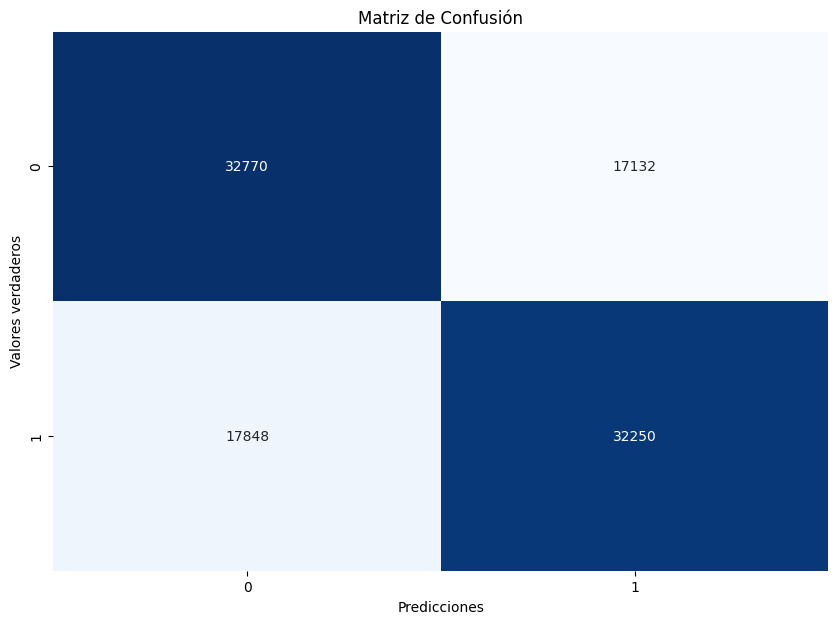

In [170]:
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de Confusión')
plt.show()